# Tensorflow & Keras Implemenation


## Import Statements

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.metrics import classification_report
from keras import backend as K
from sklearn import metrics

Using TensorFlow backend.


## Obtain Dataset

In [2]:
# Read in the training and test set
Train = pd.read_csv("C:/Users/rober/Desktop/trainData.csv")
Test = pd.read_csv("C:/Users/rober/Desktop/testData.csv")

# print out the head of each df
print(Train.shape)
print(Test.shape)

(199523, 32)
(99762, 32)


## Preprocessing

### Prepare Data

In [3]:
# Remove first column of both dataframes
del Train['Unnamed: 0']
del Test['Unnamed: 0']

# Create a new df which contains the target label and remove the label from the orignal Train set
yTrain = Train["income"]
del Train["income"]

# Create a new df which contains the target label and remove the label from the orignal Test set
yTest = Test["income"]
del Test["income"]

In [4]:
print(Train.shape)
print(Test.shape)

(199523, 30)
(99762, 30)


### One Hot Encoding

In [4]:
# Converts all Cateogroial colums into numeric columns
xTrain=pd.DataFrame(data=pd.get_dummies(Train, dtype=float))
xTest =pd.DataFrame(data=pd.get_dummies(Test, dtype=float))
print(xTrain.shape)
print(xTest.shape)

(199523, 299)
(99762, 298)


### Remove extra column

In [5]:
# delete extra column in the train set which isnt presnet in the test set.
# this will prevent issues regarding training the model later on.
del xTrain["household_status_Grandchild <18 ever marr not in subfamily"]



In [12]:
print(xTrain.shape)
print(xTest.shape)

(199523, 298)
(99762, 298)


## Common Methods

### Print Classification Report 

In [15]:
def getClassReport(yTest,pred):
    print(classification_report(yTest, pred.round()))
    

### Plot Training vs Test Error

In [18]:
def plot_history(hist, key='accuracy'):
    
    plt.figure(figsize=(16,10))
    
    for name, history in hist:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+'val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + 'Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        plt.xlim([0, max(history.epoch)])

# Model 1 - MLP

Basic Appoarch: 
 - 3 models (Baseline, smaller & larger) will be evaluated with different amount of nuroens to see which model best pedicts new records with suffering from overfitting.
 - The best model from above will then be tuned in more detail to create the MLP classifiers for this stage

## 1) Baseline Model

This model will act as the baseline and will be compared against a smaller and larger network to identiry the best appoach to avoid the model from being ovefitted.

### Define Baseline Model 

Create and organize the layers of the MLP and also specificy the amount of Neurons per layer. This model has 4 layers:
- Input layer has 298 nodes
- Hidden layer 1 has 30 nodes
- Hidden layer 2 has 30 nodes
- Output layer has 1 node

In [8]:
# Dropout can help a model generalize by randomly setting the output for a given neuron to 0. 
# In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons,
# thus changing the way the weights will be updated during the process of backpropagation.

modelMLPBaseline = Sequential()
modelMLPBaseline.add(Dense(30, input_dim=298, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modelMLPBaseline.add(Dropout(0.5))
modelMLPBaseline.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modelMLPBaseline.add(Dropout(0.5))
modelMLPBaseline.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))) # Compare against Logistic activation function

# Inspect the model
print(modelMLPBaseline.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                8970      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 9,931
Trainable params: 9,931
Non-trainable params: 0
_________________________________________________________________
None


### Compile Baseline Model 

This stage helps increase efficiency of the keras model by implementanting an optimization scheme which includes an array of paremeters which are tailored to train this model.
- Loss function: Binary_CrossEntropy
- Optimizer: rmsprop
- Metric: Accuracy


In [9]:
modelMLPBaseline.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'binary_crossentropy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fit Baseline Model

In this stage, The network is trained using the backpropagation algorithm, optimized using rmsprop and the loss function will be binary_crossentropy.
Becuase the backpropagation algorithm is used, we need to declare the following:
- Batch size: 10
- Epochs: 100

In [10]:
# returns a history object which contains a summary of the performance of the model during training.
historyBaseline = modelMLPBaseline.fit(xTrain, yTrain,epochs=20,
                                     validation_data=(xTest,yTest))


Train on 199523 samples, validate on 99762 samples
Epoch 1/20
199523/199523 [==============================] - 14s 72us/step - loss: 1.1032 - accuracy: 0.9310 - binary_crossentropy: 1.0466 - val_loss: 0.1835 - val_accuracy: 0.9409 - val_binary_crossentropy: 0.1698
Epoch 2/20
199523/199523 [==============================] - 12s 62us/step - loss: 0.2200 - accuracy: 0.9408 - binary_crossentropy: 0.2057 - val_loss: 0.1835 - val_accuracy: 0.9417 - val_binary_crossentropy: 0.1692
Epoch 3/20
199523/199523 [==============================] - 12s 61us/step - loss: 0.2182 - accuracy: 0.9405 - binary_crossentropy: 0.2042 - val_loss: 0.2341 - val_accuracy: 0.9380 - val_binary_crossentropy: 0.2202
Epoch 4/20
199523/199523 [==============================] - 12s 61us/step - loss: 0.2184 - accuracy: 0.9408 - binary_crossentropy: 0.2042 - val_loss: 0.1901 - val_accuracy: 0.9401 - val_binary_crossentropy: 0.1757
Epoch 5/20
199523/199523 [==============================] - 12s 61us/step - loss: 0.2219 - a

### Evaluate Baseline Model 

This step evaluates the perforamce of the model agaiasnt an unseen dataset (test set) 

In [11]:
# returns a list of metrics: loss and accuracy 
loss, accuracy, binaryCrossentropy = modelMLPBaseline.evaluate(xTest, yTest)
print("accuracy: ", accuracy)
print("loss: ", loss)
print("binaryCrossentropy: ", binaryCrossentropy)

99762/99762 [==============================] - 2s 18us/step
accuracy:  0.9409995675086975
loss:  0.18564766720294312
binaryCrossentropy:  0.1709105521440506


### Prediciton with Baseline Model

retun the possibility of the datarecord being of the first taget label and a classification report which contains information about accucacy, recall, precission and f1 measure

In [12]:
predBaseline = modelMLPBaseline.predict(xTest)
getClassReport(yTest, predBaseline)
print()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     93576
           1       0.80      0.06      0.12      6186

    accuracy                           0.94     99762
   macro avg       0.87      0.53      0.54     99762
weighted avg       0.93      0.94      0.92     99762




In [27]:
# Value For Graphs 

baselinef1 = metrics.f1_score(yTest, predBaseline.round())
print(baselinef1)

baselineRecall = metrics.recall_score(yTest, predBaseline.round())
print(baselineRecall)

baselinePrecision = metrics.precision_score(yTest, predBaseline.round())
print(baselinePrecision)

## 2) Smaller Model

An MLP but with less neurons in each layer:
- Input layer has 298 nodes
- Hidden layer 1 has 4 nodes
- Hidden layer 2 has 4 nodes
- Output layer has 1 node


In [1]:
def buildModelSmall():
    
    modelMLPSmaller = Sequential()
    modelMLPSmaller.add(Dense(4, input_dim=298, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    modelMLPSmaller.add(Dropout(0.5))
    modelMLPSmaller.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    modelMLPSmaller.add(Dropout(0.5))
    modelMLPSmaller.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))) # Compare against Logistic activation function

    modelMLPSmaller.compile(loss='binary_crossentropy',
                            optimizer='rmsprop',
                            metrics=['accuracy', 'binary_crossentropy'])
    return modelMLPSmaller

# returns a history object which contains a summary of the performance of the model during training.
modelMLPSmaller=buildModelSmall()
historySmaller = modelMLPSmaller.fit(xTrain, yTrain,epochs=20,
                                     validation_data=(xTest,yTest))

loss, accuracy, binaryCrossentropy = modelMLPSmaller.evaluate(xTest, yTest)
print("accuracy: ", accuracy)
print("loss: ", loss)
print("binaryCrossentropy: ", binaryCrossentropy)

predSmall = modelMLPSmaller.predict(xTest)
getClassReport(yTest, predSmall)

# print(recall_m(yTest, predSmall))
# print(precision_m(yTest, predSmall))
# print(f1_m(yTest, predSmall))

NameError: name 'Sequential' is not defined

In [8]:
# Value For Graphs 

smallModelf1 = metrics.f1_score(yTest, predSmall.round())
print(smallModelf1)

smallModelRecall = metrics.recall_score(yTest, predSmall.round())
print(smallModelRecall)

smallModelPrecision = metrics.precision_score(yTest, predSmall.round())
print(smallModelPrecision)



0.10663082437275988
0.05771096023278371
0.7


## 3) Larger model

This model has more nureons in each layer:
- Input layer has 298 nodes
- Hidden layer 1 has 100 nodes
- Hidden layer 2 has 100 nodes
- Output layer has 100 node

In [26]:
modelMLPLarger = Sequential()
modelMLPLarger.add(Dense(100, input_dim=298, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
modelMLPLarger.add(Dropout(0.5))
modelMLPLarger.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
modelMLPLarger.add(Dropout(0.5))
modelMLPLarger.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))) # Compare against Logistic activation function

modelMLPLarger.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'binary_crossentropy'])

# returns a history object which contains a summary of the performance of the model during training.
historyLarger = modelMLPLarger.fit(xTrain, yTrain,epochs=20,
                                     validation_data=(xTest,yTest))

Train on 199523 samples, validate on 99762 samples
Epoch 1/20
199523/199523 [==============================] - 25s 127us/step - loss: 2.0341 - accuracy: 0.9317 - binary_crossentropy: 1.8778 - val_loss: 0.2072 - val_accuracy: 0.9427 - val_binary_crossentropy: 0.1862
Epoch 2/20
199523/199523 [==============================] - 26s 132us/step - loss: 0.2420 - accuracy: 0.9389 - binary_crossentropy: 0.2221 - val_loss: 0.2058 - val_accuracy: 0.9389 - val_binary_crossentropy: 0.1868
Epoch 3/20
199523/199523 [==============================] - 22s 112us/step - loss: 0.2359 - accuracy: 0.9393 - binary_crossentropy: 0.2178 - val_loss: 0.1917 - val_accuracy: 0.9434 - val_binary_crossentropy: 0.1733
Epoch 4/20
199523/199523 [==============================] - 20s 101us/step - loss: 0.2301 - accuracy: 0.9401 - binary_crossentropy: 0.2127 - val_loss: 0.1899 - val_accuracy: 0.9436 - val_binary_crossentropy: 0.1728
Epoch 5/20
199523/199523 [==============================] - 28s 138us/step - loss: 0.2294

In [26]:
predLarge = modelMLPLarger.predict(xTest)
gelClassReport(yTest, predLarge)

#Graph Values
largeModelF1 = metrics.f1_score(yTest, predLarge.round())
print(largeModelF1)

largeModelRecall = metrics.recall_score(yTest, predLarge.round())
print(largeModelRecall)

largeModelPrecision = metrics.precision_score(yTest, predLarge.round())
print(largeModelPrecision)

## Plots

EXPLAIN THE PLOT & WHICH MODEL YOU SHOULD SELECT

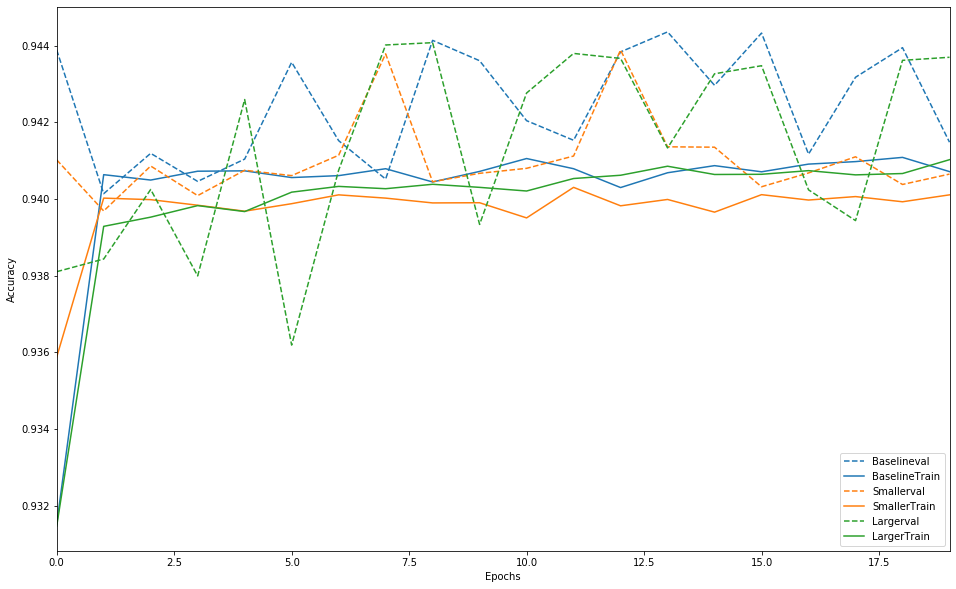

In [28]:
plot_history([('baseline',historyBaseline), ('Smaller', historySmaller), ('Larger',historyLarger)])


## Model 4) Tuned MLP

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV

buildModelSmall = KerasClassifier (build_fn=buildModelSmall, verbose=0)
# define the grid search parameters
batch_size = [10, 100]
epochs = [10, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
print("1")
grid = GridSearchCV(estimator=buildModelSmall, param_grid=param_grid, n_jobs=1, cv=3)
print("2")
grid_result = grid.fit(xTrain, yTrain)
print("3")
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

1
2


# Model 2 - Linear Classifier (Logistic Classifier Model)

Creates a Logistic Classifier model with the following parameters:
- number of columns = 2
- feature_columns = 
- optimizer = Ftrl
- Iterations = 1000

## Create a Feature Column and a Input Function, USED FOR MODELS 2 & 3

In [7]:
featureName = "features"
featurecolumns = [tf.feature_column.numeric_column(featureName, shape=[xTrain.shape[1]])]

def input_fn(dataVals, labelVals):
    def fn():
        features = {featureName: tf.constant(dataVals)}
        label = tf.constant(labelVals)
        return features, label
    return fn

## Create, Train and Evaluate the Logistic Classifier Model

In [24]:
# linear classifier model
linearEst = tf.estimator.LinearClassifier(n_classes =2,feature_columns=featurecolumns)

# Train the model
linearEst.train(input_fn=input_fn(dataTrain,labelTrain), steps=1000)

# Obrain statistics
accScore = linearEst.evaluate(input_fn=input_fn(dataTest,labelTest), steps= 1000)

pd.Series(accScore).to_frame()
print(pd.Series(accScore).to_frame())

## INFORMATION FOR PLOTS.
## Run above and found out the Recall and precision values, then sub them in below
# model2_precision = 0.422222
# model2_recall = 0.292308
# model2_f1 = 2*((model2_precision*model2_recall)/(model2_precision+model2_recall))
# print(model2_f1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rober\\AppData\\Local\\Temp\\tmpp6gnlt0q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000169D6989908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done ca

## ROC curve 

In [1]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

pred_dicts = list(linearEst.predict(input_fn(xTest,yTest)))
probsModel2 = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

def plotROC(yTest, probs):
    fpr, tpr, _ = roc_curve(yTest, probs)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.xlim(0,)
    plt.ylim(0,)
    
plotROC(yTest, probsModel2)

NameError: name 'linearEst' is not defined

# Model 3 - Boosted Tree Classififer

In [10]:
# I have used this small subset because my laptop crushes when i use the full set
dataTrain = xTrain.iloc[1:1000]
labelTrain = yTrain.iloc[1:1000]

dataTest = xTest.iloc[1:1000]
labelTest = yTest.iloc[1:1000]

In [7]:
# Create the model
tree = tf.estimator.BoostedTreesClassifier(featurecolumns, train_in_memory=True, n_batches_per_layer=1)

# Train the model
tree.train(input_fn=input_fn(dataTrain,labelTrain), steps=1000)

# Evaluate the mdodel
result = tree.evaluate(input_fn(dataTest,labelTest), steps=1000)

pd.Series(result).to_frame()

## INFORMATION FOR PLOTS.
## Run above and found out the Recall and precision values, then sub them in below
# model3_precision = XXXXXXx
# model3_recall = XXXXXX
# model3_f1 = 2*((model3_precision*model3_recall)/(model3_precision+model3_recall))
# print(model3_f1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rober\\AppData\\Local\\Temp\\tmpcr_j9j9r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019967DD5DA0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Varia

MemoryError: 